In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [7]:
df = pd.read_csv('./datasets/Advertising.csv', index_col=0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## Matriz de Correlación

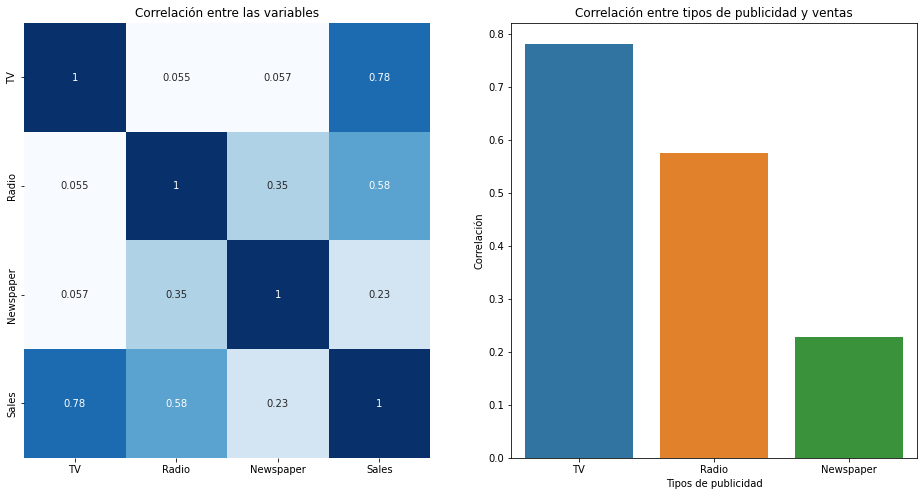

In [8]:
corr = df.corr()
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.set_title('Correlación entre las variables')
sns.heatmap(corr, annot=True, cmap='Blues', ax=ax1, cbar=False)

data = pd.DataFrame([corr["Sales"].drop("Sales")])
ax2.set_title('Correlación entre tipos de publicidad y ventas')
ax2.set_xlabel('Tipos de publicidad')
ax2.set_ylabel('Correlación')
sns.barplot(data=data, ax=ax2)

plt.show()

## Modelos de regresión lineal simple

In [10]:
def plot_regression_simple(df, x_key, y_key, title=None, xlabel=None, ylabel=None):
    if xlabel is None:
        xlabel = x_key
    if ylabel is None:
        ylabel = y_key
    X = df[x_key]
    Y = df[y_key]
    _, ax = plt.subplots(figsize=(10,  10))
    res = stats.linregress(X, Y, alternative='greater')
    trend = res.intercept + res.slope*X
    ax.scatter(X, Y, color='black', alpha=0.8)
    ax.plot(X, trend, 'r--')
    ax.grid()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    
    print(f"Error Absoluto Medio: {metrics.mean_absolute_error(Y, trend):.3f}")
    print(f"Error Cuadrático Medio: {metrics.mean_squared_error(Y, trend):.3f}")
    print(f"R^2: {res.rvalue**2:.6f}")
    print(f"p-valor: {res.pvalue:.6f}")

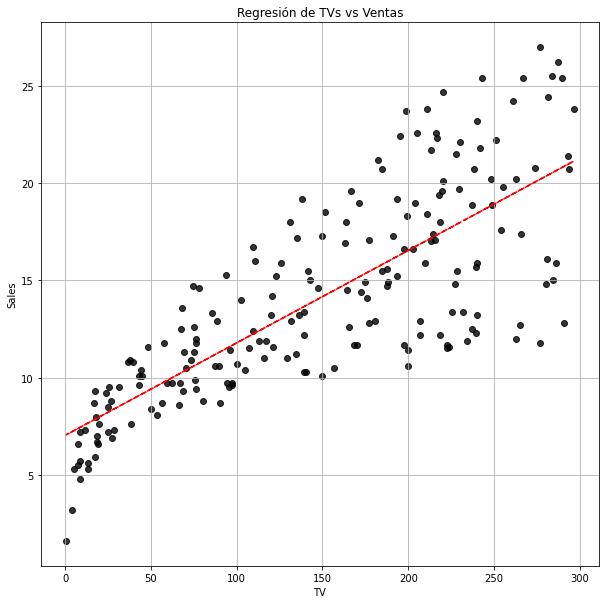

Error Absoluto Medio: 2.550
Error Cuadrático Medio: 10.513
R^2: 0.611875
p-valor: 0.000000


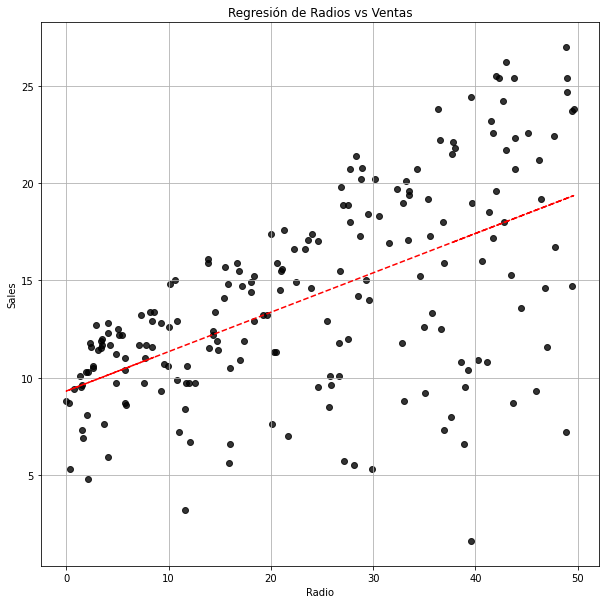

Error Absoluto Medio: 3.320
Error Cuadrático Medio: 18.092
R^2: 0.332032
p-valor: 0.000000


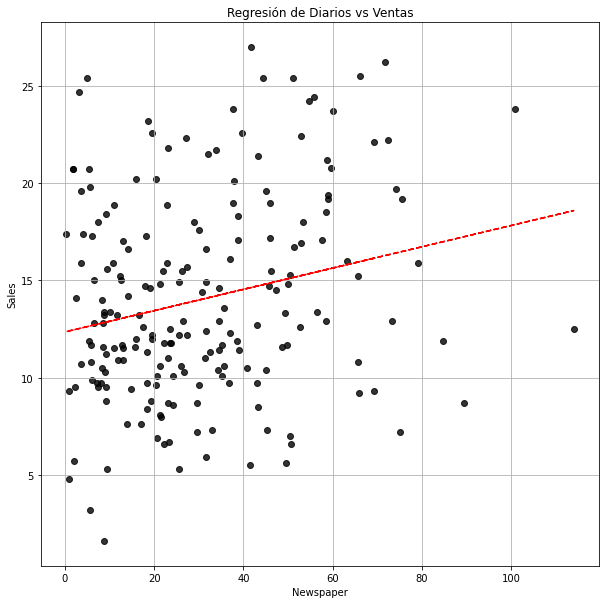

Error Absoluto Medio: 4.147
Error Cuadrático Medio: 25.674
R^2: 0.052120
p-valor: 0.000574


In [11]:
plot_regression_simple(df, "TV", "Sales", "Regresión de TVs vs Ventas")
plot_regression_simple(df, "Radio", "Sales", "Regresión de Radios vs Ventas")
plot_regression_simple(df, "Newspaper", "Sales", "Regresión de Diarios vs Ventas")

## Modelo de regresión lineal múltiple

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: Sales            AIC:                780.3622
Date:               2021-11-10 04:27 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
TV              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
Radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
Newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
--------------------

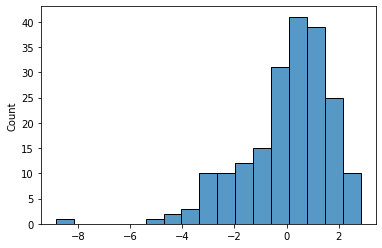

In [15]:
model = ols("Sales ~ TV + Radio + Newspaper", df).fit()

# Print the summary
# print(model.summary2())
# print(model.params)

# A chequear que estos sean correctos je
# https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html
print(f"RSS: {model.ssr}")
print(f"TSS: {model.centered_tss}")
print(f"F-estadistico: {model.fvalue}")

sns.histplot(model.resid)
plt.show()

In [24]:
def evaluateModel(model):
    print("RSS = ", ((df.Sales - model.predict())**2).sum())
    print("R2 = ", model.rsquared)


model_TV = ols('Sales ~ TV', df).fit()
model_radio = ols('Sales ~ Radio', df).fit()
model_newspaper = ols('Sales ~ Newspaper', df).fit()

print("Error evaluando solo para TV")
evaluateModel(model_TV)

print()
print("Error evaluando solo para Radio")
evaluateModel(model_radio)

print()
print("Error evaluando solo para Newspaper")
evaluateModel(model_newspaper)


model_TV_radio = ols('Sales ~ TV + Radio', df).fit()
model_TV_newspaper = ols('Sales ~ TV + Newspaper', df).fit()
model_all = ols('Sales ~ TV + Radio + Newspaper', df).fit()

print()
print("Para TV & radio")
evaluateModel(model_TV_radio)

print()
print("Para TV & newspaper")
evaluateModel(model_TV_newspaper)

print()
print("Para TV & radio & newspaper")
evaluateModel(model_all)

Error evaluando solo para TV
RSS =  2102.5305831313512
R2 =  0.611875050850071

Error evaluando solo para Radio
RSS =  3618.4795490250876
R2 =  0.33203245544529536

Error evaluando solo para Newspaper
RSS =  5134.804544111939
R2 =  0.05212044544430516
